In [38]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [39]:
red = pd.read_csv("winequality-red.csv",sep = ";")
white = pd.read_csv("winequality-white.csv",sep = ";")

In [40]:
red["isRed"] = 1
white["isRed"] = 0

In [41]:
wines = red.append(white)
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
isRed                   0
dtype: int64

In [42]:
X = wines.drop("quality",axis = 1)
y = wines["quality"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 30)

In [44]:
lr = LinearRegression()

### Linear Regression without Feature Selection

In [45]:
lr.fit(X_train,y_train)
print("Coefficients: ",lr.coef_)
print("Intercept: ",lr.intercept_)

Coefficients:  [ 1.00465264e-01 -1.47039881e+00 -7.04242446e-02  6.72046360e-02
 -5.87579301e-01  4.46068872e-03 -1.49191804e-03 -1.10750387e+02
  5.97416879e-01  6.74983147e-01  2.16784077e-01  3.32308836e-01]
Intercept:  110.8591703306718


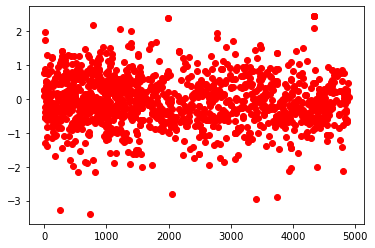

In [46]:
ypred = lr.predict(X_test)
errors = y_test - ypred
plt.plot(errors,"ro")

### Regression with Feature Selection 

In [47]:
feat_select = SelectKBest(score_func = f_regression, k = "all")
feat_select.fit(X_train, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x000001649FE94D38>)

<AxesSubplot:>

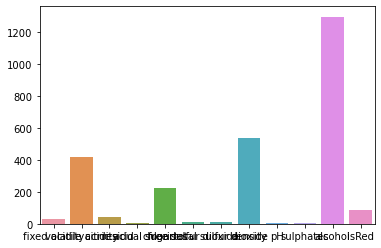

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = X.columns, y = feat_select.scores_)

In [49]:
selection_table = pd.DataFrame(feat_select.scores_,index = X.columns, columns = ["F Score"] )
selection_table["Use?"] = np.where(selection_table["F Score"]>70,"Yes","No")
selection_table

,F Score,Use?
fixed acidity,29.829652,No
volatile acidity,418.482081,Yes
citric acid,41.347690,No
residual sugar,5.140428,No
chlorides,224.084597,Yes
free sulfur dioxide,14.181955,No
total sulfur dioxide,9.261504,No
density,537.242318,Yes
pH,2.325331,No
sulphates,3.619679,No


In [50]:
X_adj = wines[["volatile acidity","chlorides","density","alcohol","isRed"]]
X_train_adj, X_test_adj, y_train, y_test = train_test_split(X_adj,y,test_size = 0.2,
                                                            random_state = 30)

In [51]:
lr = LinearRegression()
lr.fit(X_train_adj,y_train)
print("Coefficients: ",lr.coef_)
print("Intercept: ", lr.intercept_)

Coefficients:  [-1.6518898  -0.70993139 30.62114157  0.36568334  0.14148708]
Intercept:  -27.897024593250652


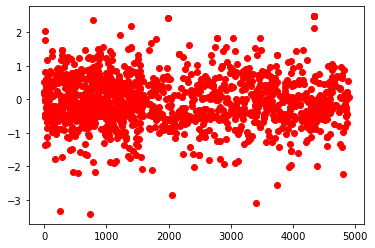

In [52]:
ypred = lr.predict(X_test_adj)
errors = y_test - ypred
plt.plot(errors,"ro")